In [91]:
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/nfl-big-data-bowl-2025/players.csv
/kaggle/input/nfl-big-data-bowl-2025/tracking_week_7.csv
/kaggle/input/nfl-big-data-bowl-2025/tracking_week_9.csv
/kaggle/input/nfl-big-data-bowl-2025/tracking_week_6.csv
/kaggle/input/nfl-big-data-bowl-2025/games.csv
/kaggle/input/nfl-big-data-bowl-2025/tracking_week_8.csv
/kaggle/input/nfl-big-data-bowl-2025/player_play.csv
/kaggle/input/nfl-big-data-bowl-2025/tracking_week_4.csv
/kaggle/input/nfl-big-data-bowl-2025/tracking_week_3.csv
/kaggle/input/nfl-big-data-bowl-2025/tracking_week_5.csv
/kaggle/input/nfl-big-data-bowl-2025/tracking_week_1.csv
/kaggle/input/nfl-big-data-bowl-2025/plays.csv
/kaggle/input/nfl-big-data-bowl-2025/tracking_week_2.csv


<center><img src='https://www.freep.com/gcdn/authoring/authoring-images/2024/09/22/PDTF/75339977007-usatsi-24301628.jpg?crop=3893,2191,x0,y202&width=660&height=371&format=pjpg&auto=webp' /></center>

<h1 style='background-color: #121212; padding: 30px; text-align: center; border: solid 5px #0076B6; border-radius: 30px 0; font-family: Helvetica; font-size: 42px; font-weight: bold; color: #0076B6;'️>☀️ The Amon-Ra Analysis ☀️</h1>

### <center>Welcome to my notebook attempting to analyze what happens before the snap of the ball that leads to an Amon-Ra St. Brown rush or reception. Currently, I have two ways to attempt to analyze, using a heatmap of the movement of St. Brown, or seeing the the average time it takes to throw the ball</center>

# <center>One Successful Amon-Ra St. Brown Play</center>

### <center>First things first, gotta load in the data and I want to explore the data for Amon-Ra St. Brown first and then try to extrapolate from there</center>

In [92]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
games = pd.read_csv("/kaggle/input/nfl-big-data-bowl-2025/games.csv")
players = pd.read_csv('/kaggle/input/nfl-big-data-bowl-2025/players.csv')
player_play = pd.read_csv('/kaggle/input/nfl-big-data-bowl-2025/player_play.csv')
plays = pd.read_csv('/kaggle/input/nfl-big-data-bowl-2025/plays.csv')
tracking_week_2 = pd.read_csv("/kaggle/input/nfl-big-data-bowl-2025/tracking_week_2.csv")

players[players['displayName'] == 'Amon-Ra St. Brown']

,nflId,height,weight,birthDate,collegeName,position,displayName
1328,53541,6-1,195,NaN,Southern California,WR,Amon-Ra St. Brown


### <center>Here are all the pass receptions and rushes that St.Brown had in the game against the Washington Commanders</center>

In [93]:
player_play[(player_play['nflId'] == 53541) & 
            ((player_play['hadRushAttempt'] == 1.0) | (player_play['hadPassReception'] == 1.0)) & 
            (player_play['gameId'] == 2022091802)]

,gameId,playId,nflId,teamAbbr,hadRushAttempt,rushingYards,hadDropback,passingYards,sackYardsAsOffense,hadPassReception,receivingYards,wasTargettedReceiver,yardageGainedAfterTheCatch,fumbles,fumbleLost,fumbleOutOfBounds,assistedTackle,forcedFumbleAsDefense,halfSackYardsAsDefense,passDefensed,quarterbackHit,sackYardsAsDefense,safetyAsDefense,soloTackle,tackleAssist,tackleForALoss,tackleForALossYardage,hadInterception,interceptionYards,fumbleRecoveries,fumbleRecoveryYards,penaltyYards,penaltyNames,wasInitialPassRusher,causedPressure,timeToPressureAsPassRusher,getOffTimeAsPassRusher,inMotionAtBallSnap,shiftSinceLineset,motionSinceLineset,wasRunningRoute,routeRan,blockedPlayerNFLId1,blockedPlayerNFLId2,blockedPlayerNFLId3,pressureAllowedAsBlocker,timeToPressureAllowedAsBlocker,pff_defensiveCoverageAssignment,pff_primaryDefensiveCoverageMatchupNflId,pff_secondaryDefensiveCoverageMatchupNflId
50940,2022091802,56,53541,DET,0,0,0,0,0,1,3,1,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,False,NaN,NaN,False,False,False,1.0,SCREEN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51116,2022091802,316,53541,DET,0,0,0,0,0,1,49,1,38,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,False,NaN,NaN,False,True,True,1.0,IN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51182,2022091802,390,53541,DET,0,0,0,0,0,1,6,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,False,NaN,NaN,False,False,False,1.0,HITCH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51468,2022091802,817,53541,DET,0,0,0,0,0,1,13,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,False,NaN,NaN,False,False,False,1.0,GO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51798,2022091802,1303,53541,DET,0,0,0,0,0,1,11,1,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,False,NaN,NaN,False,False,False,1.0,SLANT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52038,2022091802,1646,53541,DET,0,0,0,0,0,1,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,False,NaN,NaN,False,True,True,1.0,HITCH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52546,2022091802,2401,53541,DET,0,0,0,0,0,1,11,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,False,NaN,NaN,False,False,False,1.0,OUT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52744,2022091802,2710,53541,DET,1,58,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,False,NaN,NaN,True,False,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53162,2022091802,3262,53541,DET,0,0,0,0,0,1,8,1,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,False,NaN,NaN,False,False,True,1.0,OUT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53206,2022091802,3310,53541,DET,0,0,0,0,0,1,11,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,False,NaN,NaN,False,False,False,1.0,OUT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### <center>The specific play that we are going to work with currently is a play in the third quarter where Amon-Ra St. Brown swooped down and rushed the ball for 58 yards (Week 2 Game ID 2022091802 Play ID 2710)</center>

In [94]:
plays[(plays['playId'] == 2710) & (plays['gameId'] == 2022091802)]

,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,defensiveTeam,yardlineSide,yardlineNumber,gameClock,preSnapHomeScore,preSnapVisitorScore,playNullifiedByPenalty,absoluteYardlineNumber,preSnapHomeTeamWinProbability,preSnapVisitorTeamWinProbability,expectedPoints,offenseFormation,receiverAlignment,playClockAtSnap,passResult,passLength,targetX,targetY,playAction,dropbackType,dropbackDistance,passLocationType,timeToThrow,timeInTackleBox,timeToSack,passTippedAtLine,unblockedPressure,qbSpike,qbKneel,qbSneak,rushLocationType,penaltyYards,prePenaltyYardsGained,yardsGained,homeTeamWinProbabilityAdded,visitorTeamWinProbilityAdded,expectedPointsAdded,isDropback,pff_runConceptPrimary,pff_runConceptSecondary,pff_runPassOption,pff_passCoverage,pff_manZone
6533,2022091802,2710,(2:58) A.St. Brown right end pushed ob at WAS 17 for 58 yards (B.St-Juste).,3,1,10,DET,WAS,DET,25,02:58,22,15,N,35,0.797227,0.202773,1.226062,SINGLEBACK,3x1,12.0,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,False,OUTSIDE_RIGHT,NaN,58,58,0.070197,-0.070197,3.804456,False,TRICK,NaN,0,Cover-3,Zone


In [95]:
full_play = tracking_week_2[(tracking_week_2["gameId"] == 2022091802) & (tracking_week_2["playId"] == 2710)]
full_play

,gameId,playId,nflId,displayName,frameId,frameType,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event
5254718,2022091802,2710,42488.0,Bobby McCain,1,BEFORE_SNAP,2022-09-18 19:15:20.1,20.0,WAS,right,42.890000,28.08,1.41,0.17,0.14,330.62,11.93,huddle_break_offense
5254719,2022091802,2710,42488.0,Bobby McCain,2,BEFORE_SNAP,2022-09-18 19:15:20.2,20.0,WAS,right,42.920000,28.22,1.42,0.17,0.14,327.74,12.12,NaN
5254720,2022091802,2710,42488.0,Bobby McCain,3,BEFORE_SNAP,2022-09-18 19:15:20.3,20.0,WAS,right,42.950000,28.36,1.42,0.17,0.14,322.66,12.00,NaN
5254721,2022091802,2710,42488.0,Bobby McCain,4,BEFORE_SNAP,2022-09-18 19:15:20.4,20.0,WAS,right,42.980000,28.49,1.35,0.40,0.14,316.41,11.32,NaN
5254722,2022091802,2710,42488.0,Bobby McCain,5,BEFORE_SNAP,2022-09-18 19:15:20.5,20.0,WAS,right,43.000000,28.62,1.28,0.54,0.13,309.95,12.06,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5258715,2022091802,2710,NaN,football,170,AFTER_SNAP,2022-09-18 19:15:37,NaN,football,right,92.610001,0.80,8.12,3.66,0.83,NaN,NaN,tackle
5258716,2022091802,2710,NaN,football,171,AFTER_SNAP,2022-09-18 19:15:37.1,NaN,football,right,93.389999,0.78,7.60,4.21,0.78,NaN,NaN,NaN
5258717,2022091802,2710,NaN,football,172,AFTER_SNAP,2022-09-18 19:15:37.2,NaN,football,right,94.099998,0.75,6.99,4.84,0.71,NaN,NaN,NaN
5258718,2022091802,2710,NaN,football,173,AFTER_SNAP,2022-09-18 19:15:37.3,NaN,football,right,94.760002,0.70,6.42,5.08,0.66,NaN,NaN,NaN


### <center>Here is my attempt at a plotly graph object, these things get crazy complex, but it seems to work well so far</center>

In [96]:
import plotly.graph_objects as go
import plotly.io as pio

pio.renderers.default = 'iframe'


fig_dict = {
    'data': [],
    'layout': {},
    'frames': []
}

fig_dict['layout']['xaxis'] = {
    'range': [0, 100],
    'title': {'text': 'x', 'font': {'color': 'white'}},  
    'linecolor': 'black',  
    'tickcolor': 'black',  
    'dtick': 10, 
    'showgrid': True 
}

fig_dict['layout']['yaxis'] = {
    'range': [0, 50],
    'title': {'text': 'y', 'font': {'color': 'white'}},
    'linecolor': 'black', 
    'tickcolor': 'black',  
    'dtick': 10, 
    'showgrid': False  
}

fig_dict['layout']['hovermode'] = 'closest'
fig_dict['layout']['font'] = {'color': 'white'} 
fig_dict['layout']['updatemenus'] = [
    {
        "buttons": [
            {
                'args': [None, {'frame': {'duration': 50, 'redraw': False},
                                'fromcurrent': True, 'transition': {'duration': 1000}}],
                'label': 'Play',
                'method': 'animate'
            },
            {
                'args': [[None], {'frame': {'duration': 0, 'redraw': False},
                                  'mode': 'immediate',
                                  'transition': {'duration': 0}}],
                'label': 'Pause',
                'method': 'animate'
            }
        ],
        'direction': 'left',
        'pad': {'r': 10, 't': 87},
        'showactive': False,
        'type': 'buttons',
        'x': 0.1,
        'xanchor': 'right',
        'y': 0,
        'yanchor': 'top'
    }
]


sliders_dict = {
    'active': 0,
    'yanchor': 'top',
    'xanchor': 'left',
    'currentvalue': {
        'font': {'size': 20, 'color': 'black'},
        'prefix': 'Time:',
        'visible': True,
        'xanchor': 'right'
    },
    'transition': {'duration': 300},
    'pad': {'b': 10, 't': 50},
    'len': .9,
    'x': .1,
    'y': 0,
    'steps': []
}

for club in full_play['club'].unique():
    data_dict = {
        'x': full_play.loc[full_play['club'] == club, 'x'],
        'y': full_play.loc[full_play['club'] == club, 'y'],
        'mode': 'markers',
        'text': full_play.loc[full_play['club'] == club, 'displayName'],
        'name': club
    }
    fig_dict['data'].append(data_dict)

initial_frame = {'data': [], 'name': 'Initial'}
fig_dict['frames'].append(initial_frame)

for frame in full_play['frameId'].unique():
    f = {'data': [], 'name': str(frame)}
    
    for club in full_play['club'].unique():
        frame_data = {
            'x': full_play.loc[full_play['frameId'] == frame, 'x'][full_play['club'] == club],
            'y': full_play.loc[full_play['frameId'] == frame, 'y'][full_play['club'] == club],
            'mode': 'markers',
            'text': full_play.loc[full_play['frameId'] == frame, 'displayName'][full_play['club'] == club],
            'name': club
        }
        f['data'].append(frame_data) 

    fig_dict['frames'].append(f)
    
    slider_step = {
        'args': [
            [frame],
            {'frame': {'duration': 0, 'redraw': False},
             'mode': 'immediate',
             'transition': {'duration': 0}}
        ],
        'label': str(frame),
        'method': 'animate'
    }
    sliders_dict['steps'].append(slider_step) 

fig_dict['layout']['sliders'] = [sliders_dict]

fig = go.Figure(fig_dict)

if len(fig_dict['frames']) > 1:
    fig.update(data=fig_dict['frames'][1]['data']) 

fig.update_layout(paper_bgcolor='#242424', plot_bgcolor='#0a4200')
    
fig.show()


------------

------------

# <center>All Successful Amon-Ra St. Brown Plays</center>

### <center>Now, this part is to get all the plays to be centered around the origin (0,0) so that I could make a heatmap of where most players move to.</center>

In [97]:
wsh_game = player_play[(player_play['nflId'] == 53541) & 
            ((player_play['hadRushAttempt'] == 1.0) | (player_play['hadPassReception'] == 1.0)) & 
            (player_play['gameId'] == 2022091802)]['playId'].to_numpy()
wsh_game = wsh_game.tolist()

amon_ra_plays = tracking_week_2[(tracking_week_2['playId'].isin(wsh_game)) & 
                                ((tracking_week_2['club'] == 'DET') | 
                                 (tracking_week_2['club'] == 'football'))]
amon_ra_plays[amon_ra_plays['club'] == 'football']

,gameId,playId,nflId,displayName,frameId,frameType,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event
767574,2022091812,56,NaN,football,1,BEFORE_SNAP,2022-09-19 00:23:09.1,NaN,football,left,85.269997,29.809999,0.00,0.00,0.00,NaN,NaN,huddle_break_offense
767575,2022091812,56,NaN,football,2,BEFORE_SNAP,2022-09-19 00:23:09.2,NaN,football,left,85.269997,29.809999,0.00,0.00,0.00,NaN,NaN,NaN
767576,2022091812,56,NaN,football,3,BEFORE_SNAP,2022-09-19 00:23:09.3,NaN,football,left,85.269997,29.809999,0.00,0.00,0.00,NaN,NaN,NaN
767577,2022091812,56,NaN,football,4,BEFORE_SNAP,2022-09-19 00:23:09.4,NaN,football,left,85.269997,29.809999,0.00,0.00,0.00,NaN,NaN,NaN
767578,2022091812,56,NaN,football,5,BEFORE_SNAP,2022-09-19 00:23:09.5,NaN,football,left,85.279999,29.809999,0.00,0.00,0.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5385284,2022091802,3800,NaN,football,145,AFTER_SNAP,2022-09-18 20:00:31.6,NaN,football,left,42.349998,13.750000,2.56,4.35,0.21,NaN,NaN,tackle
5385285,2022091802,3800,NaN,football,146,AFTER_SNAP,2022-09-18 20:00:31.7,NaN,football,left,42.189999,13.860000,1.90,4.60,0.19,NaN,NaN,NaN
5385286,2022091802,3800,NaN,football,147,AFTER_SNAP,2022-09-18 20:00:31.8,NaN,football,left,42.049999,13.980000,1.54,4.35,0.18,NaN,NaN,NaN
5385287,2022091802,3800,NaN,football,148,AFTER_SNAP,2022-09-18 20:00:31.9,NaN,football,left,41.959999,14.070000,1.16,3.98,0.14,NaN,NaN,NaN


### <center>This is where I changed all the coordinates of the players to be centered around (0,0)</center>

In [98]:
current_df = pd.DataFrame()

for play in wsh_game:
    df_tobeadded = amon_ra_plays[(amon_ra_plays['playId'] == play) & (amon_ra_plays['frameType'] == 'BEFORE_SNAP') & (amon_ra_plays['gameId'] == 2022091802)]
    condition = ((df_tobeadded['frameId'] == 1) & 
                 (df_tobeadded['club'] == 'football'))
    value_x = df_tobeadded.loc[condition, 'x'].iat[0]
    value_y = df_tobeadded.loc[condition, 'y'].iat[0]
    
    df_tobeadded['x'] = df_tobeadded['x'].apply(lambda x: x - value_x)
    df_tobeadded['y'] = df_tobeadded['y'].apply(lambda y: y - value_y)
    
    current_df = pd.concat([current_df, df_tobeadded])

current_df

/tmp/ipykernel_24/4023174559.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_24/4023174559.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,gameId,playId,nflId,displayName,frameId,frameType,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event
4936581,2022091802,56,43290.0,Jared Goff,1,BEFORE_SNAP,2022-09-18 17:03:18.3,16.0,DET,right,-6.010001,0.430001,0.52,0.99,0.05,127.60,135.70,huddle_break_offense
4936582,2022091802,56,43290.0,Jared Goff,2,BEFORE_SNAP,2022-09-18 17:03:18.4,16.0,DET,right,-5.970001,0.390001,0.59,0.77,0.06,123.70,135.51,NaN
4936583,2022091802,56,43290.0,Jared Goff,3,BEFORE_SNAP,2022-09-18 17:03:18.5,16.0,DET,right,-5.930001,0.340001,0.66,0.49,0.06,119.42,133.79,NaN
4936584,2022091802,56,43290.0,Jared Goff,4,BEFORE_SNAP,2022-09-18 17:03:18.6,16.0,DET,right,-5.880001,0.300001,0.68,0.22,0.07,118.43,131.05,NaN
4936585,2022091802,56,43290.0,Jared Goff,5,BEFORE_SNAP,2022-09-18 17:03:18.7,16.0,DET,right,-5.820001,0.260001,0.69,0.10,0.07,116.81,126.20,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5385233,2022091802,3800,NaN,football,94,BEFORE_SNAP,2022-09-18 20:00:26.5,NaN,football,left,0.010002,0.039999,0.00,0.00,0.00,NaN,NaN,NaN
5385234,2022091802,3800,NaN,football,95,BEFORE_SNAP,2022-09-18 20:00:26.6,NaN,football,left,0.010002,0.039999,0.00,0.00,0.00,NaN,NaN,NaN
5385235,2022091802,3800,NaN,football,96,BEFORE_SNAP,2022-09-18 20:00:26.7,NaN,football,left,0.010002,0.039999,0.00,0.00,0.00,NaN,NaN,NaN
5385236,2022091802,3800,NaN,football,97,BEFORE_SNAP,2022-09-18 20:00:26.8,NaN,football,left,0.010002,0.039999,0.00,0.00,0.00,NaN,NaN,NaN


In [99]:
import plotly.express as px

fig = px.scatter(current_df, animation_frame='frameId', color='displayName', animation_group='playId',
           x='x', y='y', hover_name='nflId', range_x=[-50,50], range_y=[-25,25])

fig.update_layout(paper_bgcolor='#242424', plot_bgcolor='#0a4200', font={'color':'#FFFFFF'})

fig

### <center>Finally, I was able to switch the plays going from right to left to left to right</center>

In [100]:
current_df['x']= current_df[current_df['playDirection'] == 'left']['x'].apply(lambda x: -abs(x))
current_df[current_df['playDirection'] == 'left']

,gameId,playId,nflId,displayName,frameId,frameType,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event
5092675,2022091802,1303,43290.0,Jared Goff,1,BEFORE_SNAP,2022-09-18 18:02:02.6,16.0,DET,left,-5.160001,-0.179999,0.55,0.37,0.05,294.85,334.34,huddle_break_offense
5092676,2022091802,1303,43290.0,Jared Goff,2,BEFORE_SNAP,2022-09-18 18:02:02.7,16.0,DET,left,-5.130001,-0.129999,0.60,0.38,0.06,283.96,335.64,NaN
5092677,2022091802,1303,43290.0,Jared Goff,3,BEFORE_SNAP,2022-09-18 18:02:02.8,16.0,DET,left,-5.110001,-0.079999,0.58,0.32,0.06,272.60,341.09,NaN
5092678,2022091802,1303,43290.0,Jared Goff,4,BEFORE_SNAP,2022-09-18 18:02:02.9,16.0,DET,left,-5.100001,-0.019999,0.53,0.43,0.06,256.51,347.39,NaN
5092679,2022091802,1303,43290.0,Jared Goff,5,BEFORE_SNAP,2022-09-18 18:02:03,16.0,DET,left,-5.090001,0.030001,0.49,0.49,0.05,245.39,351.18,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5385233,2022091802,3800,NaN,football,94,BEFORE_SNAP,2022-09-18 20:00:26.5,NaN,football,left,-0.010002,0.039999,0.00,0.00,0.00,NaN,NaN,NaN
5385234,2022091802,3800,NaN,football,95,BEFORE_SNAP,2022-09-18 20:00:26.6,NaN,football,left,-0.010002,0.039999,0.00,0.00,0.00,NaN,NaN,NaN
5385235,2022091802,3800,NaN,football,96,BEFORE_SNAP,2022-09-18 20:00:26.7,NaN,football,left,-0.010002,0.039999,0.00,0.00,0.00,NaN,NaN,NaN
5385236,2022091802,3800,NaN,football,97,BEFORE_SNAP,2022-09-18 20:00:26.8,NaN,football,left,-0.010002,0.039999,0.00,0.00,0.00,NaN,NaN,NaN


In [101]:
fig = px.scatter(current_df, animation_frame='frameId', color='displayName', animation_group='playId',
           x='x', y='y', hover_name='nflId', range_x=[-50,50], range_y=[-25,25])

fig.update_layout(paper_bgcolor='#242424', plot_bgcolor='#0a4200', font={'color':'#FFFFFF'})

fig

--------

--------

# <center>Heatmap attempt</center>

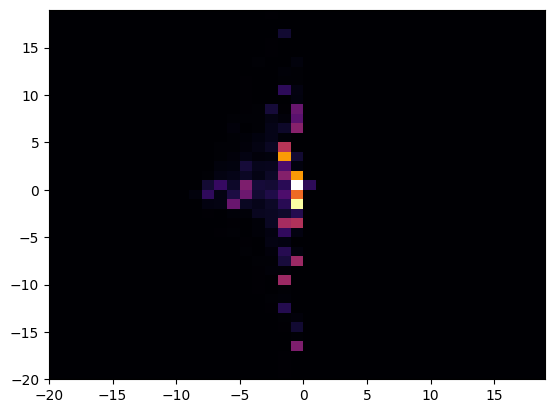

In [102]:
import matplotlib.pyplot as plt

plt.hist2d(current_df['x'], current_df['y'], bins=[np.arange(-20,20,1), np.arange(-20,20,1)], cmax=550, cmap='inferno')
plt.show()

### <center>So now, this does not tell me much information. It maybe that I just need to specify on WRs, but let's see what focusing on just Amon-Ra St.Brown does</center>

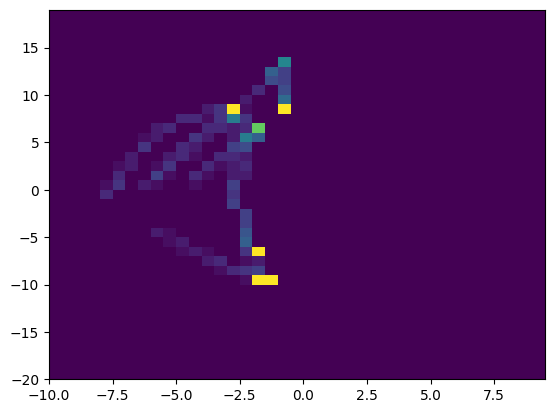

In [103]:
import matplotlib.colors as mcolors

hist = plt.hist2d(current_df[current_df['nflId'] == 53541]['x'], current_df[current_df['nflId'] == 53541]['y'], bins=[np.arange(-10,10,.5), np.arange(-20,20,1)], cmap='viridis', density=True, norm=mcolors.Normalize(vmin=0, vmax=.08))
plt.show()

### <center>Now, we are seeing something here (might not be useful), but St. Brown likes to be near the bottom of the field rather than the top. We can also see some of the movement he does going p or down from his original position (can't see the direction of movement)</center>

### <center>So now we need to try to see a difference between those that Amon-Ra St. Brown had a rush or pass attempt to those where he did not. Now I just need to decide whether to use exclusively plays where Amon-Ra St. Brown was targeted, plays where it was a pass, or all plays where he was on the field</center>

In [104]:
non_wsh_game = player_play[(player_play['nflId'] == 53541) & 
            ((player_play['hadRushAttempt'] == 0) | (player_play['hadPassReception'] == 0)) & 
            (player_play['gameId'] == 2022091802)]['playId'].to_numpy()

non_wsh_game.tolist()

non_amon_ra = tracking_week_2[(tracking_week_2['playId'].isin(non_wsh_game)) & 
                                ((tracking_week_2['club'] == 'DET') | 
                                 (tracking_week_2['club'] == 'football'))]

non_amon_ra[non_amon_ra['club'] == 'DET']

,gameId,playId,nflId,displayName,frameId,frameType,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event
4936581,2022091802,56,43290.0,Jared Goff,1,BEFORE_SNAP,2022-09-18 17:03:18.3,16.0,DET,right,28.80,24.39,0.52,0.99,0.05,127.60,135.70,huddle_break_offense
4936582,2022091802,56,43290.0,Jared Goff,2,BEFORE_SNAP,2022-09-18 17:03:18.4,16.0,DET,right,28.84,24.35,0.59,0.77,0.06,123.70,135.51,NaN
4936583,2022091802,56,43290.0,Jared Goff,3,BEFORE_SNAP,2022-09-18 17:03:18.5,16.0,DET,right,28.88,24.30,0.66,0.49,0.06,119.42,133.79,NaN
4936584,2022091802,56,43290.0,Jared Goff,4,BEFORE_SNAP,2022-09-18 17:03:18.6,16.0,DET,right,28.93,24.26,0.68,0.22,0.07,118.43,131.05,NaN
4936585,2022091802,56,43290.0,Jared Goff,5,BEFORE_SNAP,2022-09-18 17:03:18.7,16.0,DET,right,28.99,24.22,0.69,0.10,0.07,116.81,126.20,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5387784,2022091802,3828,53541.0,Amon-Ra St. Brown,121,AFTER_SNAP,2022-09-18 20:01:48.6,14.0,DET,left,37.24,24.13,7.16,0.92,0.72,16.51,340.62,pass_outcome_incomplete
5387785,2022091802,3828,53541.0,Amon-Ra St. Brown,122,AFTER_SNAP,2022-09-18 20:01:48.7,14.0,DET,left,36.99,24.80,7.05,1.39,0.71,8.07,339.33,NaN
5387786,2022091802,3828,53541.0,Amon-Ra St. Brown,123,AFTER_SNAP,2022-09-18 20:01:48.8,14.0,DET,left,36.74,25.42,6.75,2.20,0.68,359.23,337.82,NaN
5387787,2022091802,3828,53541.0,Amon-Ra St. Brown,124,AFTER_SNAP,2022-09-18 20:01:48.9,14.0,DET,left,36.49,26.01,6.33,3.08,0.64,346.37,336.36,NaN


In [105]:
test = tracking_week_2[(tracking_week_2["gameId"] == 2022091802) & (tracking_week_2["playId"] == 3828)]
test

,gameId,playId,nflId,displayName,frameId,frameType,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event
5385289,2022091802,3828,42488.0,Bobby McCain,1,BEFORE_SNAP,2022-09-18 20:01:36.6,20.0,WAS,left,34.670000,26.640000,0.00,0.00,0.00,89.58,9.12,huddle_break_offense
5385290,2022091802,3828,42488.0,Bobby McCain,2,BEFORE_SNAP,2022-09-18 20:01:36.7,20.0,WAS,left,34.670000,26.640000,0.00,0.00,0.00,88.60,11.23,NaN
5385291,2022091802,3828,42488.0,Bobby McCain,3,BEFORE_SNAP,2022-09-18 20:01:36.8,20.0,WAS,left,34.670000,26.650000,0.00,0.00,0.00,88.60,14.13,NaN
5385292,2022091802,3828,42488.0,Bobby McCain,4,BEFORE_SNAP,2022-09-18 20:01:36.9,20.0,WAS,left,34.670000,26.650000,0.00,0.00,0.00,86.73,17.24,NaN
5385293,2022091802,3828,42488.0,Bobby McCain,5,BEFORE_SNAP,2022-09-18 20:01:37,20.0,WAS,left,34.680000,26.660000,0.00,0.00,0.00,86.73,18.42,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5388159,2022091802,3828,NaN,football,121,AFTER_SNAP,2022-09-18 20:01:48.6,NaN,football,left,37.349998,24.530001,6.21,0.57,0.63,NaN,NaN,pass_outcome_incomplete
5388160,2022091802,3828,NaN,football,122,AFTER_SNAP,2022-09-18 20:01:48.7,NaN,football,left,37.080002,25.070000,6.10,1.04,0.61,NaN,NaN,NaN
5388161,2022091802,3828,NaN,football,123,AFTER_SNAP,2022-09-18 20:01:48.8,NaN,football,left,36.810001,25.610001,5.85,1.83,0.60,NaN,NaN,NaN
5388162,2022091802,3828,NaN,football,124,AFTER_SNAP,2022-09-18 20:01:48.9,NaN,football,left,36.560001,26.120001,5.66,2.24,0.58,NaN,NaN,NaN


In [106]:
import plotly.graph_objects as go


fig_dict = {
    'data': [],
    'layout': {},
    'frames': []
}

fig_dict['layout']['xaxis'] = {
    'range': [0, 100],
    'title': {'text': 'x', 'font': {'color': 'white'}},  
    'linecolor': 'black',  
    'tickcolor': 'black',  
    'dtick': 10, 
    'showgrid': True 
}

fig_dict['layout']['yaxis'] = {
    'range': [0, 50],
    'title': {'text': 'y', 'font': {'color': 'white'}},
    'linecolor': 'black', 
    'tickcolor': 'black',  
    'dtick': 10, 
    'showgrid': False  
}

fig_dict['layout']['hovermode'] = 'closest'
fig_dict['layout']['font'] = {'color': 'white'} 
fig_dict['layout']['updatemenus'] = [
    {
        "buttons": [
            {
                'args': [None, {'frame': {'duration': 50, 'redraw': False},
                                'fromcurrent': True, 'transition': {'duration': 1000}}],
                'label': 'Play',
                'method': 'animate'
            },
            {
                'args': [[None], {'frame': {'duration': 0, 'redraw': False},
                                  'mode': 'immediate',
                                  'transition': {'duration': 0}}],
                'label': 'Pause',
                'method': 'animate'
            }
        ],
        'direction': 'left',
        'pad': {'r': 10, 't': 87},
        'showactive': False,
        'type': 'buttons',
        'x': 0.1,
        'xanchor': 'right',
        'y': 0,
        'yanchor': 'top'
    }
]


sliders_dict = {
    'active': 0,
    'yanchor': 'top',
    'xanchor': 'left',
    'currentvalue': {
        'font': {'size': 20, 'color': 'black'},
        'prefix': 'Time:',
        'visible': True,
        'xanchor': 'right'
    },
    'transition': {'duration': 300},
    'pad': {'b': 10, 't': 50},
    'len': .9,
    'x': .1,
    'y': 0,
    'steps': []
}

for club in test['club'].unique():
    data_dict = {
        'x': test.loc[test['club'] == club, 'x'],
        'y': test.loc[test['club'] == club, 'y'],
        'mode': 'markers',
        'text': test.loc[test['club'] == club, 'displayName'],
        'name': club
    }
    fig_dict['data'].append(data_dict)

initial_frame = {'data': [], 'name': 'Initial'}
fig_dict['frames'].append(initial_frame)

for frame in test['frameId'].unique():
    f = {'data': [], 'name': str(frame)}
    
    for club in test['club'].unique():
        frame_data = {
            'x': test.loc[test['frameId'] == frame, 'x'][test['club'] == club],
            'y': test.loc[test['frameId'] == frame, 'y'][test['club'] == club],
            'mode': 'markers',
            'text': test.loc[test['frameId'] == frame, 'displayName'][test['club'] == club],
            'name': club
        }
        f['data'].append(frame_data) 

    fig_dict['frames'].append(f)
    
    slider_step = {
        'args': [
            [frame],
            {'frame': {'duration': 0, 'redraw': False},
             'mode': 'immediate',
             'transition': {'duration': 0}}
        ],
        'label': str(frame),
        'method': 'animate'
    }
    sliders_dict['steps'].append(slider_step) 

fig_dict['layout']['sliders'] = [sliders_dict]

fig = go.Figure(fig_dict)

if len(fig_dict['frames']) > 1:
    fig.update(data=fig_dict['frames'][1]['data']) 

fig.update_layout(paper_bgcolor='#242424', plot_bgcolor='#0a4200')
    
fig.show()


In [107]:
non_current_df = pd.DataFrame()

for play in non_wsh_game:
    df_tobeadded = non_amon_ra[(non_amon_ra['playId'] == play) & (non_amon_ra['frameType'] == 'BEFORE_SNAP') & (non_amon_ra['gameId'] == 2022091802)]
    condition = ((df_tobeadded['frameId'] == 1) & 
                 (df_tobeadded['club'] == 'football'))
    value_x = df_tobeadded.loc[condition, 'x'].iat[0]
    value_y = df_tobeadded.loc[condition, 'y'].iat[0]
    
    df_tobeadded['x'] = df_tobeadded['x'].apply(lambda x: x - value_x)
    df_tobeadded['y'] = df_tobeadded['y'].apply(lambda y: y - value_y)
    
    non_current_df = pd.concat([non_current_df, df_tobeadded])

non_current_df

/tmp/ipykernel_24/268936074.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_24/268936074.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,gameId,playId,nflId,displayName,frameId,frameType,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event
4936581,2022091802,56,43290.0,Jared Goff,1,BEFORE_SNAP,2022-09-18 17:03:18.3,16.0,DET,right,-6.010001,0.430001,0.52,0.99,0.05,127.60,135.70,huddle_break_offense
4936582,2022091802,56,43290.0,Jared Goff,2,BEFORE_SNAP,2022-09-18 17:03:18.4,16.0,DET,right,-5.970001,0.390001,0.59,0.77,0.06,123.70,135.51,NaN
4936583,2022091802,56,43290.0,Jared Goff,3,BEFORE_SNAP,2022-09-18 17:03:18.5,16.0,DET,right,-5.930001,0.340001,0.66,0.49,0.06,119.42,133.79,NaN
4936584,2022091802,56,43290.0,Jared Goff,4,BEFORE_SNAP,2022-09-18 17:03:18.6,16.0,DET,right,-5.880001,0.300001,0.68,0.22,0.07,118.43,131.05,NaN
4936585,2022091802,56,43290.0,Jared Goff,5,BEFORE_SNAP,2022-09-18 17:03:18.7,16.0,DET,right,-5.820001,0.260001,0.69,0.10,0.07,116.81,126.20,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5388121,2022091802,3828,NaN,football,83,BEFORE_SNAP,2022-09-18 20:01:44.8,NaN,football,left,-0.150002,0.000000,0.00,0.00,0.00,NaN,NaN,NaN
5388122,2022091802,3828,NaN,football,84,BEFORE_SNAP,2022-09-18 20:01:44.9,NaN,football,left,-0.150002,0.000000,0.00,0.00,0.00,NaN,NaN,NaN
5388123,2022091802,3828,NaN,football,85,BEFORE_SNAP,2022-09-18 20:01:45,NaN,football,left,-0.150002,0.000000,0.00,0.00,0.00,NaN,NaN,NaN
5388124,2022091802,3828,NaN,football,86,BEFORE_SNAP,2022-09-18 20:01:45.1,NaN,football,left,-0.150002,0.000000,0.00,0.00,0.00,NaN,NaN,NaN


In [108]:
import plotly.express as px

fig = px.scatter(non_current_df, animation_frame='frameId', color='displayName', animation_group='playId',
           x='x', y='y', hover_name='nflId', range_x=[-50,50], range_y=[-25,25])

fig.update_layout(paper_bgcolor='#242424', plot_bgcolor='#0a4200', font={'color':'#FFFFFF'})

fig

In [109]:
non_current_df['x'] = non_current_df[non_current_df['playDirection'] == 'left']['x'].apply(lambda x: -abs(x))
non_current_df[non_current_df['playDirection'] == 'left']

,gameId,playId,nflId,displayName,frameId,frameType,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event
5056415,2022091802,1034,43290.0,Jared Goff,1,BEFORE_SNAP,2022-09-18 17:48:47.8,16.0,DET,left,-5.259999,-1.829999,0.01,0.01,0.01,335.24,317.00,huddle_break_offense
5056416,2022091802,1034,43290.0,Jared Goff,2,BEFORE_SNAP,2022-09-18 17:48:47.9,16.0,DET,left,-5.259999,-1.819999,0.01,0.01,0.01,333.63,327.27,NaN
5056417,2022091802,1034,43290.0,Jared Goff,3,BEFORE_SNAP,2022-09-18 17:48:48,16.0,DET,left,-5.259999,-1.799999,0.01,0.01,0.02,333.63,331.64,NaN
5056418,2022091802,1034,43290.0,Jared Goff,4,BEFORE_SNAP,2022-09-18 17:48:48.1,16.0,DET,left,-5.259999,-1.769999,0.02,0.02,0.03,335.07,341.58,NaN
5056419,2022091802,1034,43290.0,Jared Goff,5,BEFORE_SNAP,2022-09-18 17:48:48.2,16.0,DET,left,-5.259999,-1.729999,0.02,0.02,0.04,330.05,345.36,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5388121,2022091802,3828,NaN,football,83,BEFORE_SNAP,2022-09-18 20:01:44.8,NaN,football,left,-0.150002,0.000000,0.00,0.00,0.00,NaN,NaN,NaN
5388122,2022091802,3828,NaN,football,84,BEFORE_SNAP,2022-09-18 20:01:44.9,NaN,football,left,-0.150002,0.000000,0.00,0.00,0.00,NaN,NaN,NaN
5388123,2022091802,3828,NaN,football,85,BEFORE_SNAP,2022-09-18 20:01:45,NaN,football,left,-0.150002,0.000000,0.00,0.00,0.00,NaN,NaN,NaN
5388124,2022091802,3828,NaN,football,86,BEFORE_SNAP,2022-09-18 20:01:45.1,NaN,football,left,-0.150002,0.000000,0.00,0.00,0.00,NaN,NaN,NaN


### <center>From the scatterplots above and below, we can see that (though obvious) there are a lot more plays not being the target or having a successful reception</center>

In [110]:
fig = px.scatter(non_current_df, animation_frame='frameId', color='displayName', animation_group='playId',
           x='x', y='y', hover_name='nflId', range_x=[-50,50], range_y=[-25,25])

fig.update_layout(paper_bgcolor='#242424', plot_bgcolor='#0a4200', font={'color':'#FFFFFF'})

fig

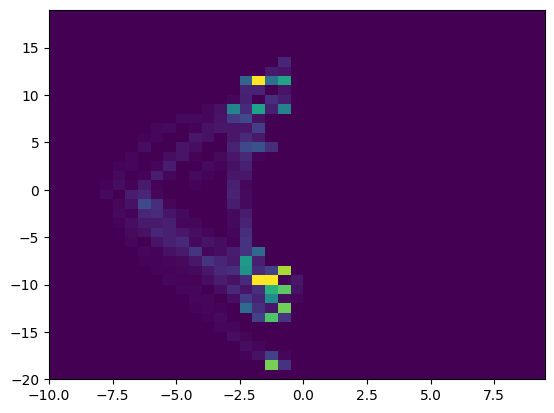

In [111]:
non_hist = plt.hist2d(non_current_df[non_current_df['nflId'] == 53541]['x'], non_current_df[non_current_df['nflId'] == 53541]['y'], bins=[np.arange(-10,10,.5), np.arange(-20,20,1)], cmap='viridis', density=True, norm=mcolors.Normalize(vmin=0, vmax=.08))
plt.show()

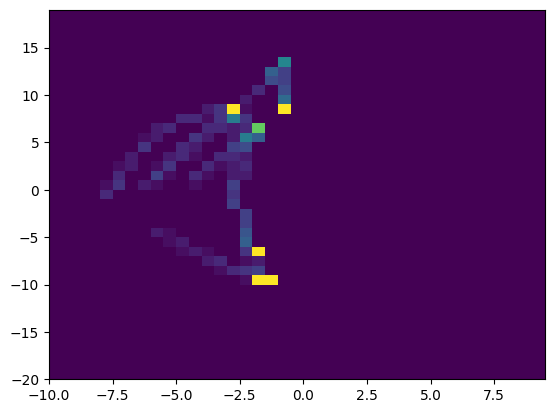

In [112]:
hist = plt.hist2d(current_df[current_df['nflId'] == 53541]['x'], current_df[current_df['nflId'] == 53541]['y'], bins=[np.arange(-10,10,.5), np.arange(-20,20,1)], cmap='viridis', density=True, norm=mcolors.Normalize(vmin=0, vmax=.08))
plt.show()

### <center>With this heatmap, we can slightly see that it is more common (relatively) that he switches to the other side if he is going to have a successful reception or rush. However it might not be conclusive. We might need to look at all of his output and plays where he did not have a successful reception</center>

----------

----------

<h1 style='background-color: #121212; padding: 15px; text-align: center; border: solid 5px #0076B6; border-radius: 15px 0; font-family: Helvetica; font-size: 32px; font-weight: normal; color: #0076B6;'️>Time Differences</h1>

In [113]:
success_plays = player_play[(player_play['nflId'] == 53541) & 
            (player_play['hadPassReception'] == 1.0) & 
            (player_play['gameId'] == 2022091802)]['playId'].to_numpy().tolist()

non_plays = player_play[(player_play['teamAbbr'] == 'DET') & 
            ((player_play['hadRushAttempt'] == 0) & (player_play['wasTargettedReceiver'] == 1)) &
            (player_play['nflId'] != 53541) &
            (player_play['gameId'] == 2022091802)]['playId'].to_numpy().tolist()

In [114]:
successful_plays = plays[(plays['playId'].isin(success_plays)) & 
                        (plays['gameId'] == 2022091802)]

successful_plays

,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,defensiveTeam,yardlineSide,yardlineNumber,gameClock,preSnapHomeScore,preSnapVisitorScore,playNullifiedByPenalty,absoluteYardlineNumber,preSnapHomeTeamWinProbability,preSnapVisitorTeamWinProbability,expectedPoints,offenseFormation,receiverAlignment,playClockAtSnap,passResult,passLength,targetX,targetY,playAction,dropbackType,dropbackDistance,passLocationType,timeToThrow,timeInTackleBox,timeToSack,passTippedAtLine,unblockedPressure,qbSpike,qbKneel,qbSneak,rushLocationType,penaltyYards,prePenaltyYardsGained,yardsGained,homeTeamWinProbabilityAdded,visitorTeamWinProbilityAdded,expectedPointsAdded,isDropback,pff_runConceptPrimary,pff_runConceptSecondary,pff_runPassOption,pff_passCoverage,pff_manZone
3184,2022091802,3310,"(7:05) J.Goff pass short left to A.St. Brown for 11 yards, TOUCHDOWN.",4,1,10,DET,WAS,WAS,11,07:05,29,21,N,21,0.953797,0.046203,5.017214,SINGLEBACK,3x1,7.0,C,11.0,9.80,3.00,True,TRADITIONAL,6.42,INSIDE_BOX,2.683,2.683,NaN,False,False,False,0,NaN,NaN,NaN,11,11,0.017575,-0.017575,1.982786,True,INSIDE ZONE,NaN,0,Red Zone,Other
6619,2022091802,1646,(4:12) (Shotgun) J.Goff pass short right to A.St. Brown to DET 22 for 4 yards (D.Forrest).,2,1,10,DET,WAS,DET,18,04:12,22,0,N,92,0.936555,0.063445,0.486712,EMPTY,3x2,8.0,C,4.0,88.46,36.75,False,TRADITIONAL,2.61,INSIDE_BOX,2.036,2.036,NaN,False,True,False,0,NaN,NaN,NaN,4,4,0.001259,-0.001259,-0.028063,True,NaN,NaN,0,Cover-3,Zone
6700,2022091802,3262,(8:35) (Shotgun) J.Goff pass short left to A.St. Brown to WAS 36 for 8 yards (K.Fuller).,4,2,10,DET,WAS,WAS,44,08:35,29,21,N,54,0.899706,0.100294,2.519330,EMPTY,3x2,9.0,C,4.0,50.37,11.49,False,TRADITIONAL,3.05,INSIDE_BOX,2.236,2.236,NaN,False,False,False,0,NaN,NaN,NaN,8,8,0.009939,-0.009939,0.436937,True,NaN,NaN,0,Quarters,Zone
6816,2022091802,56,(15:00) (Shotgun) J.Goff pass short right to A.St. Brown pushed ob at DET 28 for 3 yards (D.Forrest).,1,1,10,DET,WAS,DET,25,15:00,0,0,N,35,0.446686,0.553314,1.298699,SHOTGUN,3x1,13.0,C,-3.0,32.16,10.79,False,TRADITIONAL,0.57,INSIDE_BOX,1.204,1.204,NaN,False,False,False,0,NaN,NaN,NaN,3,3,-0.023231,0.023231,-0.491171,True,NaN,NaN,0,Cover-3,Zone
7735,2022091802,2401,(9:33) (Shotgun) J.Goff pass short right to A.St. Brown pushed ob at DET 32 for 11 yards (D.Forrest).,3,2,9,DET,WAS,DET,21,09:33,22,7,N,31,0.888713,0.111287,0.284506,SHOTGUN,2x2,14.0,C,9.0,40.53,7.20,False,TRADITIONAL,3.80,INSIDE_BOX,2.355,2.355,NaN,False,False,False,0,NaN,NaN,NaN,11,11,0.015651,-0.015651,1.501227,True,NaN,NaN,0,Cover-1,Man
9070,2022091802,1303,(9:37) (Shotgun) J.Goff pass short middle to A.St. Brown to WAS 27 for 11 yards (D.Forrest; B.McCain).,2,1,10,DET,WAS,WAS,38,09:37,15,0,N,48,0.878003,0.121997,3.299600,SHOTGUN,2x2,2.0,C,6.0,42.03,20.57,False,TRADITIONAL,3.53,INSIDE_BOX,2.036,2.036,NaN,False,False,False,0,NaN,NaN,NaN,11,11,0.001864,-0.001864,0.777642,True,NaN,NaN,0,Cover-3,Zone
9678,2022091802,316,(10:18) (Shotgun) J.Goff pass short middle to A.St. Brown pushed ob at WAS 24 for 49 yards (D.Forrest).,1,3,3,DET,WAS,DET,27,10:18,0,0,N,37,0.433712,0.566288,0.316648,SHOTGUN,3x1,10.0,C,11.0,48.56,27.20,False,TRADITIONAL,4.36,INSIDE_BOX,2.842,2.842,NaN,False,False,False,0,NaN,NaN,NaN,49,49,0.115815,-0.115815,4.267667,True,NaN,NaN,0,Cover-1,Man
14391,2022091802,817,"(1:45) (Shotgun) J.Goff pass short right to A.St. Brown for 13 yards, TOUCHDOWN [M.Sweat].",1,3,5,DET,WAS,WAS,13,01:45,5,0,N,97,0.724939,0.275061,3.952699,SHOTGUN,3x1,12.0,C,13.0,117.61,14.68,False,SCRAMBLE,3.15,OUTSIDE_RIGHT,3.715,3.300,NaN,False,False,False,0,NaN,NaN,NaN,13,13,0.058859,-0.058859,3.047301,True,NaN,NaN,0,Cover-1,Man
15221,2022091802,390,(8:51) (Shotgun) J.Goff pass short right to A.St. Brown to WAS 17 for 6 yards (B.St-Juste).,1,3,9,DET,WAS,WAS,23,08:51,0,0,N,87,0.524821,0.475179,3.641508,SHOTGUN,3x1,5.0,C,5.0,92.30,13.39,False,TRADITIONAL,3.18,INSIDE_BOX,2.435,2.435,NaN,False,False,False,0,NaN,NaN,NaN,6,6,-0.013927,0.013927,-0.793729,True,NaN,NaN,0,Quarters,Zone


In [115]:
successful_times = successful_plays.loc[:, 'timeToThrow'].mean()
successful_times

2.3935555555555554

In [116]:
non_amon_plays = plays[(plays['playId'].isin(non_plays)) & 
                        (plays['gameId'] == 2022091802)]

non_amon_plays

,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,defensiveTeam,yardlineSide,yardlineNumber,gameClock,preSnapHomeScore,preSnapVisitorScore,playNullifiedByPenalty,absoluteYardlineNumber,preSnapHomeTeamWinProbability,preSnapVisitorTeamWinProbability,expectedPoints,offenseFormation,receiverAlignment,playClockAtSnap,passResult,passLength,targetX,targetY,playAction,dropbackType,dropbackDistance,passLocationType,timeToThrow,timeInTackleBox,timeToSack,passTippedAtLine,unblockedPressure,qbSpike,qbKneel,qbSneak,rushLocationType,penaltyYards,prePenaltyYardsGained,yardsGained,homeTeamWinProbabilityAdded,visitorTeamWinProbilityAdded,expectedPointsAdded,isDropback,pff_runConceptPrimary,pff_runConceptSecondary,pff_runPassOption,pff_passCoverage,pff_manZone
511,2022091802,1393,"(6:47) J.Goff pass short middle to J.Reynolds for 3 yards, TOUCHDOWN.",2,1,3,DET,WAS,WAS,3,06:47,15,0,N,13,0.901040,0.098960,5.965764,SINGLEBACK,2x2,5.0,C,3.0,1.69,33.30,True,TRADITIONAL,5.84,INSIDE_BOX,2.269,2.269,NaN,False,False,False,0,NaN,NaN,NaN,3,3,0.023391,-0.023391,1.034236,True,INSIDE ZONE,NaN,0,Red Zone,Other
885,2022091802,3215,(9:56) M.Nelson reported in as eligible. J.Goff pass deep middle to T.Hockenson to WAS 44 for 18 yards (W.Jackson).,4,2,2,DET,WAS,DET,38,09:56,29,21,N,72,0.876139,0.123861,1.942038,I_FORM,1x1,12.0,C,17.0,55.89,25.81,True,TRADITIONAL,5.41,INSIDE_BOX,3.370,3.370,NaN,False,False,False,0,NaN,NaN,NaN,18,18,0.024749,-0.024749,1.135154,True,INSIDE ZONE,NaN,0,Cover-3,Zone
1135,2022091802,1954,(:22) (Shotgun) J.Goff pass incomplete deep right to D.Chark.,2,3,10,DET,WAS,DET,20,00:22,22,0,N,90,0.948451,0.051549,0.117209,SHOTGUN,3x1,8.0,I,45.0,46.53,39.04,False,TRADITIONAL,4.75,INSIDE_BOX,3.604,3.604,NaN,False,False,False,0,NaN,NaN,NaN,0,0,-0.002839,0.002839,-0.114577,True,NaN,NaN,0,Cover-6 Right,Zone
1856,2022091802,2750,(1:42) (Shotgun) J.Goff pass incomplete short middle to T.Hockenson.,3,2,15,DET,WAS,WAS,22,01:42,22,15,N,88,0.853549,0.146451,3.710758,EMPTY,4x1,11.0,I,13.0,97.35,23.72,False,TRADITIONAL,2.64,INSIDE_BOX,2.569,2.569,NaN,False,False,False,0,NaN,NaN,NaN,0,0,-0.006066,0.006066,-0.666505,True,NaN,NaN,0,Quarters,Zone
2313,2022091802,2772,"(1:38) (Shotgun) J.Goff pass short right to D.Swift for 22 yards, TOUCHDOWN [J.Davis].",3,3,15,DET,WAS,WAS,22,01:38,22,15,N,88,0.847483,0.152517,3.044254,SHOTGUN,2x2,5.0,C,2.0,89.20,12.18,False,TRADITIONAL,5.11,INSIDE_BOX,2.069,2.069,NaN,False,True,False,0,NaN,NaN,NaN,22,22,0.049796,-0.049796,3.955746,True,NaN,NaN,0,Cover-3,Zone
2654,2022091802,368,(8:56) (Shotgun) J.Goff pass incomplete deep left to D.Swift.,1,2,9,DET,WAS,WAS,23,08:56,0,0,N,87,0.543632,0.456368,4.209163,SHOTGUN,3x1,9.0,I,23.0,109.56,50.40,False,TRADITIONAL,3.96,INSIDE_BOX,2.469,2.469,NaN,False,False,False,0,NaN,NaN,NaN,0,0,-0.018811,0.018811,-0.567655,True,NaN,NaN,0,Quarters,Zone
2928,2022091802,1010,(15:00) M.Nelson reported in as eligible. J.Goff pass incomplete deep left to D.Chark (K.Fuller).,2,1,10,DET,WAS,WAS,35,15:00,12,0,N,45,0.850323,0.149677,3.571572,SINGLEBACK,2x1,16.0,I,35.0,7.70,5.25,False,TRADITIONAL,4.60,OUTSIDE_LEFT,4.738,3.500,NaN,False,False,False,0,NaN,NaN,NaN,0,0,-0.003931,0.003931,-0.456651,True,OUTSIDE ZONE,NaN,0,Cover-3,Zone
3697,2022091802,2451,(8:21) J.Goff pass incomplete short left to D.Swift.,3,2,8,DET,WAS,DET,34,08:21,22,7,N,44,0.902227,0.097773,1.245982,SINGLEBACK,3x1,3.0,I,2.0,42.72,44.90,True,TRADITIONAL,6.07,INSIDE_BOX,3.203,3.203,NaN,False,False,False,0,NaN,NaN,NaN,0,0,-0.007632,0.007632,-0.835690,True,OUTSIDE ZONE,NaN,0,Cover-1,Man
5235,2022091802,1256,(10:57) (Shotgun) M.Nelson reported in as eligible. J.Goff pass short left to Ja.Williams to WAS 49 for 7 yards (B.McCain).,2,1,10,DET,WAS,DET,44,10:57,15,0,N,66,0.869515,0.130485,2.086455,EMPTY,3x1,13.0,C,5.0,61.32,17.68,False,TRADITIONAL,3.62,INSIDE_BOX,3.070,3.070,NaN,False,False,False,0,NaN,NaN,NaN,7,7,0.006310,-0.006310,0.362986,True,NaN,NaN,0,Cover-3,Zone
5740,2022091802,3286,(7:49) (Shotgun) J.Goff pass short right to B.Wri

In [117]:
non_amon_times = non_amon_plays.loc[:, 'timeToThrow'].mean()
non_amon_times

2.793761904761905

Just realized this is not useful because this is after the snap and not before, what I wanted to do is time from the break of the huddle to the snap

### <center>From 2.4 to 2.8 that is a 16% difference, which could be significant considering at this time Amon-Ra St. Brown was by far their best receiver.</center>

|Player|Receptions|Yards|Touchdowns|
|-------------------------|------|----|----|
|Amon-Ra St. Brown        |106|1161|6|
|EVERYONE ELSE ON THE TEAM|127|1801|7|

-------

-------

# <center>Analysis of formations that lead to Amon-Ra St. Brown receptions</center>

In [118]:
success_plays = player_play[(player_play['nflId'] == 53541) & 
            ((player_play['hadPassReception'] == 1.0) | (player_play['hadRushAttempt'] == 1.0)) & 
            (player_play['gameId'] == 2022091802)]['playId'].to_numpy().tolist()

success_plays

[56, 316, 390, 817, 1303, 1646, 2401, 2710, 3262, 3310, 3800]

In [119]:
successful_plays = plays[(plays['playId'].isin(success_plays)) & (plays['gameId'] == 2022091802)]

In [120]:
successful_plays['offenseFormation'].value_counts()

offenseFormation
SHOTGUN       6
SINGLEBACK    3
EMPTY         2
Name: count, dtype: int64

In [121]:
successful_plays[successful_plays['offenseFormation'] == 'SINGLEBACK']

,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,defensiveTeam,yardlineSide,yardlineNumber,gameClock,preSnapHomeScore,preSnapVisitorScore,playNullifiedByPenalty,absoluteYardlineNumber,preSnapHomeTeamWinProbability,preSnapVisitorTeamWinProbability,expectedPoints,offenseFormation,receiverAlignment,playClockAtSnap,passResult,passLength,targetX,targetY,playAction,dropbackType,dropbackDistance,passLocationType,timeToThrow,timeInTackleBox,timeToSack,passTippedAtLine,unblockedPressure,qbSpike,qbKneel,qbSneak,rushLocationType,penaltyYards,prePenaltyYardsGained,yardsGained,homeTeamWinProbabilityAdded,visitorTeamWinProbilityAdded,expectedPointsAdded,isDropback,pff_runConceptPrimary,pff_runConceptSecondary,pff_runPassOption,pff_passCoverage,pff_manZone
3184,2022091802,3310,"(7:05) J.Goff pass short left to A.St. Brown for 11 yards, TOUCHDOWN.",4,1,10,DET,WAS,WAS,11,07:05,29,21,N,21,0.953797,0.046203,5.017214,SINGLEBACK,3x1,7.0,C,11.0,9.8,3.0,True,TRADITIONAL,6.42,INSIDE_BOX,2.683,2.683,NaN,False,False,False,0,NaN,NaN,NaN,11,11,0.017575,-0.017575,1.982786,True,INSIDE ZONE,NaN,0,Red Zone,Other
6533,2022091802,2710,(2:58) A.St. Brown right end pushed ob at WAS 17 for 58 yards (B.St-Juste).,3,1,10,DET,WAS,DET,25,02:58,22,15,N,35,0.797227,0.202773,1.226062,SINGLEBACK,3x1,12.0,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,False,OUTSIDE_RIGHT,NaN,58,58,0.070197,-0.070197,3.804456,False,TRICK,NaN,0,Cover-3,Zone
11470,2022091802,3800,(1:44) A.St. Brown left end to WAS 33 for 10 yards (K.Fuller).,4,3,13,DET,WAS,WAS,43,01:44,36,27,N,53,0.995422,0.004578,1.325820,SINGLEBACK,3x1,14.0,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,False,OUTSIDE_LEFT,NaN,10,10,0.000298,-0.000298,-0.327222,False,TRICK,NaN,0,Cover-0,Man


There is an interesting thing that a singleback position 

In [122]:
successful_plays['pff_passCoverage'].unique()

array(['Red Zone', 'Cover-3', 'Quarters', 'Cover-1', 'Cover-0'],
      dtype=object)

In [123]:
successful_plays['pff_manZone'].unique()

array(['Other', 'Zone', 'Man'], dtype=object)

# <center>Offensive Linemen and Amon-Ra St. Brown</center>

### <center>This is where I plan on exploring other players positions and seeing how that leads to an Amon-Ra St. Brown play or not, so I will focus on Penei Sewell currently, an offensive tackle with 2 pro bowls under his belt (and hopefully three soon)</center>

In [124]:
players[players['displayName'] == 'Penei Sewell']

,nflId,height,weight,birthDate,collegeName,position,displayName
1235,53436,6-6,325,NaN,Oregon,T,Penei Sewell


In [125]:
ps_play = tracking_week_2[(tracking_week_2["gameId"] == 2022091802) & (tracking_week_2["playId"] == 316) & (tracking_week_2['nflId'] == 53436)]
ps_play

,gameId,playId,nflId,displayName,frameId,frameType,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event
4967468,2022091802,316,53436.0,Penei Sewell,1,BEFORE_SNAP,2022-09-18 17:12:34.6,58.0,DET,right,34.76,26.96,1.27,1.56,0.13,88.71,116.94,NaN
4967469,2022091802,316,53436.0,Penei Sewell,2,BEFORE_SNAP,2022-09-18 17:12:34.7,58.0,DET,right,34.86,26.91,1.09,1.51,0.11,85.61,116.13,NaN
4967470,2022091802,316,53436.0,Penei Sewell,3,BEFORE_SNAP,2022-09-18 17:12:34.8,58.0,DET,right,34.95,26.85,0.98,1.34,0.11,82.91,119.19,NaN
4967471,2022091802,316,53436.0,Penei Sewell,4,BEFORE_SNAP,2022-09-18 17:12:34.9,58.0,DET,right,35.04,26.82,0.85,1.21,0.09,80.38,116.74,NaN
4967472,2022091802,316,53436.0,Penei Sewell,5,BEFORE_SNAP,2022-09-18 17:12:35,58.0,DET,right,35.11,26.79,0.72,1.09,0.08,79.62,113.05,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4967728,2022091802,316,53436.0,Penei Sewell,261,AFTER_SNAP,2022-09-18 17:13:00.6,58.0,DET,right,33.59,23.84,3.15,0.36,0.32,79.88,78.64,out_of_bounds
4967729,2022091802,316,53436.0,Penei Sewell,262,AFTER_SNAP,2022-09-18 17:13:00.7,58.0,DET,right,33.91,23.90,3.18,0.51,0.32,79.28,78.52,NaN
4967730,2022091802,316,53436.0,Penei Sewell,263,AFTER_SNAP,2022-09-18 17:13:00.8,58.0,DET,right,34.24,23.97,3.24,0.67,0.33,77.62,78.85,NaN
4967731,2022091802,316,53436.0,Penei Sewell,264,AFTER_SNAP,2022-09-18 17:13:00.9,58.0,DET,right,34.57,24.04,3.28,0.66,0.34,83.30,78.01,NaN


In [126]:
import plotly.graph_objects as go


fig_dict = {
    'data': [],
    'layout': {},
    'frames': []
}

fig_dict['layout']['xaxis'] = {
    'range': [0, 100],
    'title': {'text': 'x', 'font': {'color': 'white'}},  
    'linecolor': 'black',  
    'tickcolor': 'black',  
    'dtick': 10, 
    'showgrid': True 
}

fig_dict['layout']['yaxis'] = {
    'range': [0, 50],
    'title': {'text': 'y', 'font': {'color': 'white'}},
    'linecolor': 'black', 
    'tickcolor': 'black',  
    'dtick': 10, 
    'showgrid': False  
}

fig_dict['layout']['hovermode'] = 'closest'
fig_dict['layout']['font'] = {'color': 'white'} 
fig_dict['layout']['updatemenus'] = [
    {
        "buttons": [
            {
                'args': [None, {'frame': {'duration': 50, 'redraw': False},
                                'fromcurrent': True, 'transition': {'duration': 1000}}],
                'label': 'Play',
                'method': 'animate'
            },
            {
                'args': [[None], {'frame': {'duration': 0, 'redraw': False},
                                  'mode': 'immediate',
                                  'transition': {'duration': 0}}],
                'label': 'Pause',
                'method': 'animate'
            }
        ],
        'direction': 'left',
        'pad': {'r': 10, 't': 87},
        'showactive': False,
        'type': 'buttons',
        'x': 0.1,
        'xanchor': 'right',
        'y': 0,
        'yanchor': 'top'
    }
]


sliders_dict = {
    'active': 0,
    'yanchor': 'top',
    'xanchor': 'left',
    'currentvalue': {
        'font': {'size': 20, 'color': 'black'},
        'prefix': 'Time:',
        'visible': True,
        'xanchor': 'right'
    },
    'transition': {'duration': 300},
    'pad': {'b': 10, 't': 50},
    'len': .9,
    'x': .1,
    'y': 0,
    'steps': []
}

for club in ps_play['club'].unique():
    data_dict = {
        'x': ps_play.loc[ps_play['club'] == club, 'x'],
        'y': ps_play.loc[ps_play['club'] == club, 'y'],
        'mode': 'markers',
        'text': ps_play.loc[ps_play['club'] == club, 'displayName'],
        'name': club
    }
    fig_dict['data'].append(data_dict)

initial_frame = {'data': [], 'name': 'Initial'}
fig_dict['frames'].append(initial_frame)

for frame in ps_play['frameId'].unique():
    f = {'data': [], 'name': str(frame)}
    
    for club in ps_play['club'].unique():
        frame_data = {
            'x': ps_play.loc[ps_play['frameId'] == frame, 'x'][ps_play['club'] == club],
            'y': ps_play.loc[ps_play['frameId'] == frame, 'y'][ps_play['club'] == club],
            'mode': 'markers',
            'text': ps_play.loc[ps_play['frameId'] == frame, 'displayName'][ps_play['club'] == club],
            'name': club
        }
        f['data'].append(frame_data) 

    fig_dict['frames'].append(f)
    
    slider_step = {
        'args': [
            [frame],
            {'frame': {'duration': 0, 'redraw': False},
             'mode': 'immediate',
             'transition': {'duration': 0}}
        ],
        'label': str(frame),
        'method': 'animate'
    }
    sliders_dict['steps'].append(slider_step) 

fig_dict['layout']['sliders'] = [sliders_dict]

fig = go.Figure(fig_dict)

if len(fig_dict['frames']) > 1:
    fig.update(data=fig_dict['frames'][1]['data']) 

fig.update_layout(paper_bgcolor='#242424', plot_bgcolor='#0a4200')
    
fig.show()

In [127]:
ps_play[ps_play['event'] == 'ball_snap']

,gameId,playId,nflId,displayName,frameId,frameType,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event
4967634,2022091802,316,53436.0,Penei Sewell,167,SNAP,2022-09-18 17:12:51.2,58.0,DET,right,35.44,26.94,0.05,0.94,0.01,91.06,227.37,ball_snap


In [128]:
ps_play[ps_play['event'] == 'line_set']

,gameId,playId,nflId,displayName,frameId,frameType,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event
4967507,2022091802,316,53436.0,Penei Sewell,40,BEFORE_SNAP,2022-09-18 17:12:38.5,58.0,DET,right,35.59,27.01,0.0,0.01,0.0,90.88,113.29,line_set


In [129]:
ps_play_condensed = ps_play[39:167]
ps_play_condensed

,gameId,playId,nflId,displayName,frameId,frameType,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event
4967507,2022091802,316,53436.0,Penei Sewell,40,BEFORE_SNAP,2022-09-18 17:12:38.5,58.0,DET,right,35.59,27.01,0.00,0.01,0.00,90.88,113.29,line_set
4967508,2022091802,316,53436.0,Penei Sewell,41,BEFORE_SNAP,2022-09-18 17:12:38.6,58.0,DET,right,35.58,27.01,0.00,0.00,0.01,91.50,85.53,NaN
4967509,2022091802,316,53436.0,Penei Sewell,42,BEFORE_SNAP,2022-09-18 17:12:38.7,58.0,DET,right,35.58,27.02,0.00,0.00,0.00,91.50,51.94,NaN
4967510,2022091802,316,53436.0,Penei Sewell,43,BEFORE_SNAP,2022-09-18 17:12:38.8,58.0,DET,right,35.58,27.01,0.00,0.00,0.01,91.50,156.96,NaN
4967511,2022091802,316,53436.0,Penei Sewell,44,BEFORE_SNAP,2022-09-18 17:12:38.9,58.0,DET,right,35.58,27.01,0.00,0.00,0.00,91.50,171.31,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4967630,2022091802,316,53436.0,Penei Sewell,163,BEFORE_SNAP,2022-09-18 17:12:50.8,58.0,DET,right,35.45,26.95,0.00,0.00,0.00,89.80,334.52,NaN
4967631,2022091802,316,53436.0,Penei Sewell,164,BEFORE_SNAP,2022-09-18 17:12:50.9,58.0,DET,right,35.45,26.95,0.00,0.00,0.00,89.80,329.73,NaN
4967632,2022091802,316,53436.0,Penei Sewell,165,BEFORE_SNAP,2022-09-18 17:12:51,58.0,DET,right,35.45,26.95,0.00,0.00,0.00,89.80,321.53,NaN
4967633,2022091802,316,53436.0,Penei Sewell,166,BEFORE_SNAP,2022-09-18 17:12:51.1,58.0,DET,right,35.44,26.95,0.00,0.00,0.01,91.06,268.36,NaN


In [130]:
ps_play_condensed['o'].mean()

89.42210937499998

In [131]:
non_ast_ps_play = tracking_week_2[(tracking_week_2["gameId"] == 2022091802) & (tracking_week_2["playId"] == 56) & (tracking_week_2['nflId'] == 53436)]
non_ast_ps_play = non_ast_ps_play[34:42]
non_ast_ps_play['o'].mean()

75.06125

### A difference!! Granted this is only one play, but maybe if we generalize this to other plays

In [132]:
test_2['nflId'].unique().tolist()

[42488.0,
 43290.0,
 43305.0,
 43313.0,
 43373.0,
 44829.0,
 44930.0,
 44947.0,
 45721.0,
 46082.0,
 46679.0,
 47791.0,
 47809.0,
 47956.0,
 52529.0,
 52574.0,
 52637.0,
 53436.0,
 53503.0,
 53541.0,
 53592.0,
 54733.0,
 nan]

In [133]:
test_2 = tracking_week_2[(tracking_week_2['playId'] == 3800) 
                                    & ((tracking_week_2['frameType'] == 'BEFORE_SNAP') | (tracking_week_2['frameType'] == 'SNAP'))
                                    & (tracking_week_2['gameId'] == 2022091802)]

test_df = pd.DataFrame()

for player in test_2['nflId'].unique().tolist()[:-1]:
    df_tobeadded = test_2[test_2['nflId'] == player]
    lineset_index = df_tobeadded.index[df_tobeadded['event'] == 'line_set'].tolist()
    lineset_index = lineset_index[0]
    print(player)
    ballsnap_index = df_tobeadded.index[df_tobeadded["event"] == "ball_snap"].tolist()
    ballsnap_index = ballsnap_index[0]

    df_tobeadded = df_tobeadded.loc[lineset_index:ballsnap_index]

    test_df = pd.concat([test_df, df_tobeadded])

test_df

42488.0
43290.0
43305.0
43313.0
43373.0
44829.0
44930.0
44947.0
45721.0
46082.0
46679.0
47791.0
47809.0
47956.0
52529.0
52574.0
52637.0
53436.0
53503.0
53541.0
53592.0
54733.0


,gameId,playId,nflId,displayName,frameId,frameType,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event
5381939,2022091802,3800,42488.0,Bobby McCain,78,BEFORE_SNAP,2022-09-18 20:00:24.9,20.0,WAS,left,49.66,23.36,0.99,0.80,0.10,79.66,93.88,line_set
5381940,2022091802,3800,42488.0,Bobby McCain,79,BEFORE_SNAP,2022-09-18 20:00:25,20.0,WAS,left,49.76,23.36,0.92,0.82,0.09,77.28,88.94,NaN
5381941,2022091802,3800,42488.0,Bobby McCain,80,BEFORE_SNAP,2022-09-18 20:00:25.1,20.0,WAS,left,49.85,23.36,0.87,0.69,0.09,74.25,86.73,NaN
5381942,2022091802,3800,42488.0,Bobby McCain,81,BEFORE_SNAP,2022-09-18 20:00:25.2,20.0,WAS,left,49.93,23.37,0.85,0.48,0.09,71.00,85.07,NaN
5381943,2022091802,3800,42488.0,Bobby McCain,82,BEFORE_SNAP,2022-09-18 20:00:25.3,20.0,WAS,left,50.03,23.37,0.88,0.23,0.09,68.59,85.51,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5385085,2022091802,3800,54733.0,Donovan Jeter,95,BEFORE_SNAP,2022-09-18 20:00:26.6,91.0,WAS,left,52.01,29.97,0.00,0.00,0.00,101.90,267.17,NaN
5385086,2022091802,3800,54733.0,Donovan Jeter,96,BEFORE_SNAP,2022-09-18 20:00:26.7,91.0,WAS,left,52.01,29.97,0.00,0.00,0.00,101.90,260.19,NaN
5385087,2022091802,3800,54733.0,Donovan Jeter,97,BEFORE_SNAP,2022-09-18 20:00:26.8,91.0,WAS,left,52.01,29.97,0.00,0.03,0.00,101.90,290.48,NaN
5385088,2022091802,3800,54733.0,Donovan Jeter,98,BEFORE_SNAP,2022-09-18 20:00:26.9,91.0,WAS,left,52.01,29.98,0.01,0.14,0.00,101.90,2.11,NaN


In [134]:
ps_current_df = pd.DataFrame()

for play in success_plays:
    df_tobeadded = amon_ra_plays[(amon_ra_plays['playId'] == play) 
                                    & ((amon_ra_plays['frameType'] == 'BEFORE_SNAP') | (amon_ra_plays['frameType'] == 'SNAP'))
                                    & (amon_ra_plays['gameId'] == 2022091802)]
    lineset_index = df_tobeadded[df_tobeadded['event'] == 'line_set'].index[0]
    ballsnap_index = df_tobeadded[df_tobeadded['event'] == 'ball_snap'].index[0]
    df_tobeadded = df_tobeadded[lineset_index:ballsnap_index]

    ps_current_df = pd.concat([ps_current_df, df_tobeadded])

ps_current_df

,gameId,playId,nflId,displayName,frameId,frameType,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event


In [135]:
non_wsh_game = player_play[(player_play['nflId'] == 53541) & 
            (player_play['hadPassReception'] == 0) & 
            (player_play['gameId'] == 2022091802)]['playId'].to_numpy()

ps_current_df = pd.DataFrame()

for play in non_wsh_game:
    df_tobeadded = non_amon_ra[(non_amon_ra['playId'] == play) & (non_amon_ra['frameType'] == 'BEFORE_SNAP') & (non_amon_ra['gameId'] == 2022091802)]
    condition = ((df_tobeadded['frameId'] == 1) & 
                 (df_tobeadded['club'] == 'football'))
    value_x = df_tobeadded.loc[condition, 'x'].iat[0]
    value_y = df_tobeadded.loc[condition, 'y'].iat[0]
    
    df_tobeadded['x'] = df_tobeadded['x'].apply(lambda x: x - value_x)
    df_tobeadded['y'] = df_tobeadded['y'].apply(lambda y: y - value_y)
    
    ps_current_df = pd.concat([non_current_df, df_tobeadded])

ps_current_df

/tmp/ipykernel_24/673521877.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_24/673521877.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,gameId,playId,nflId,displayName,frameId,frameType,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event
4936581,2022091802,56,43290.0,Jared Goff,1,BEFORE_SNAP,2022-09-18 17:03:18.3,16.0,DET,right,NaN,0.430001,0.52,0.99,0.05,127.60,135.70,huddle_break_offense
4936582,2022091802,56,43290.0,Jared Goff,2,BEFORE_SNAP,2022-09-18 17:03:18.4,16.0,DET,right,NaN,0.390001,0.59,0.77,0.06,123.70,135.51,NaN
4936583,2022091802,56,43290.0,Jared Goff,3,BEFORE_SNAP,2022-09-18 17:03:18.5,16.0,DET,right,NaN,0.340001,0.66,0.49,0.06,119.42,133.79,NaN
4936584,2022091802,56,43290.0,Jared Goff,4,BEFORE_SNAP,2022-09-18 17:03:18.6,16.0,DET,right,NaN,0.300001,0.68,0.22,0.07,118.43,131.05,NaN
4936585,2022091802,56,43290.0,Jared Goff,5,BEFORE_SNAP,2022-09-18 17:03:18.7,16.0,DET,right,NaN,0.260001,0.69,0.10,0.07,116.81,126.20,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5388121,2022091802,3828,NaN,football,83,BEFORE_SNAP,2022-09-18 20:01:44.8,NaN,football,left,-0.150002,0.000000,0.00,0.00,0.00,NaN,NaN,NaN
5388122,2022091802,3828,NaN,football,84,BEFORE_SNAP,2022-09-18 20:01:44.9,NaN,football,left,-0.150002,0.000000,0.00,0.00,0.00,NaN,NaN,NaN
5388123,2022091802,3828,NaN,football,85,BEFORE_SNAP,2022-09-18 20:01:45,NaN,football,left,-0.150002,0.000000,0.00,0.00,0.00,NaN,NaN,NaN
5388124,2022091802,3828,NaN,football,86,BEFORE_SNAP,2022-09-18 20:01:45.1,NaN,football,left,-0.150002,0.000000,0.00,0.00,0.00,NaN,NaN,NaN


[56, 316, 390, 817, 1303, 1646, 2401, 3262, 3310]